## DATASCI S12
#### Alderite, Christian Nicole
#### Carlos, Eduard Martin
#### Santiago, John Andrew

##### Project Notebook 1 (Score 2)

## Note: The main notebook file of the project is named 'DATASCI Project Total Score.ipynb'. This file is a supplementary file for the combination of all scores calculated and gathered.
##### Explanations, Methodologies, and Assumptions can be found at the end of this notebook.

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [3]:
dfMain = dfMain.filter(['mainid','brgy','radio','celfone','telefone','car','motor']);
# Filters the dataframe to show only the relevant columns for this scoring phase

dfMain

,mainid,brgy,radio,celfone,telefone,car,motor
0,1061066,186,0,2,0,0,0
1,555683,69,1,2,0,0,0
2,8611889,1,1,1,0,1,0
3,299398,165,0,0,0,0,0
4,136921,135,1,1,0,0,0
5,3842267,43,0,0,0,0,0
6,899855,201,1,3,0,1,1
7,235953,190,0,2,0,0,1
8,1591438,47,0,1,0,0,0
9,1053432,130,0,3,0,0,0


In [4]:
for i, row in dfMain.iterrows():
    if (row['radio'] > 0) :
        dfMain.at[i,'radio']=1
    if (row['celfone'] > 0) :
        dfMain.at[i,'celfone']=1
    if (row['telefone'] > 0) :
        dfMain.at[i,'telefone']=1
    if (row['car'] > 0) :
        dfMain.at[i,'car']=1
    if (row['motor'] > 0) :
        dfMain.at[i,'motor']=1

# Changing quantity responses into True or False responses
# If there is one occurence or more it is True, False if none
        
dfMain


,mainid,brgy,radio,celfone,telefone,car,motor
0,1061066,186,0,1,0,0,0
1,555683,69,1,1,0,0,0
2,8611889,1,1,1,0,1,0
3,299398,165,0,0,0,0,0
4,136921,135,1,1,0,0,0
5,3842267,43,0,0,0,0,0
6,899855,201,1,1,0,1,1
7,235953,190,0,1,0,0,1
8,1591438,47,0,1,0,0,0
9,1053432,130,0,1,0,0,0


In [5]:
dfMain['asset_total'] =  dfMain['radio'] + dfMain['celfone'] + dfMain['telefone'] + dfMain['car'] + dfMain['motor']
# Adds the total number of True responses for the 7 assets

dfMain['asset_score'] = dfMain['asset_total'] / 5
# Scores the asset ownership of each family by getting the ratio of amount of types of possessed assets over 7.

dfMain

,mainid,brgy,radio,celfone,telefone,car,motor,asset_total,asset_score
0,1061066,186,0,1,0,0,0,1,0.2
1,555683,69,1,1,0,0,0,2,0.4
2,8611889,1,1,1,0,1,0,3,0.6
3,299398,165,0,0,0,0,0,0,0.0
4,136921,135,1,1,0,0,0,2,0.4
5,3842267,43,0,0,0,0,0,0,0.0
6,899855,201,1,1,0,1,1,4,0.8
7,235953,190,0,1,0,0,1,2,0.4
8,1591438,47,0,1,0,0,0,1,0.2
9,1053432,130,0,1,0,0,0,1,0.2


In [6]:
dfBrgy1 = dfMain.loc[dfMain.brgy == 1]
dfBrgy1

# Just to check if output is correct, Brgy 1 has 7 respondents with a total of 2.57 score, therefore averaging on 0.367347

,mainid,brgy,radio,celfone,telefone,car,motor,asset_total,asset_score
2,8611889,1,1,1,0,1,0,3,0.6
4207,130766,1,0,1,0,0,0,1,0.2
16399,1057542,1,0,1,0,0,0,1,0.2
20626,120577,1,0,1,0,0,0,1,0.2
21826,254233,1,1,1,1,0,0,3,0.6
21827,254229,1,0,1,0,0,0,1,0.2
57661,3397181,1,0,1,0,0,0,1,0.2


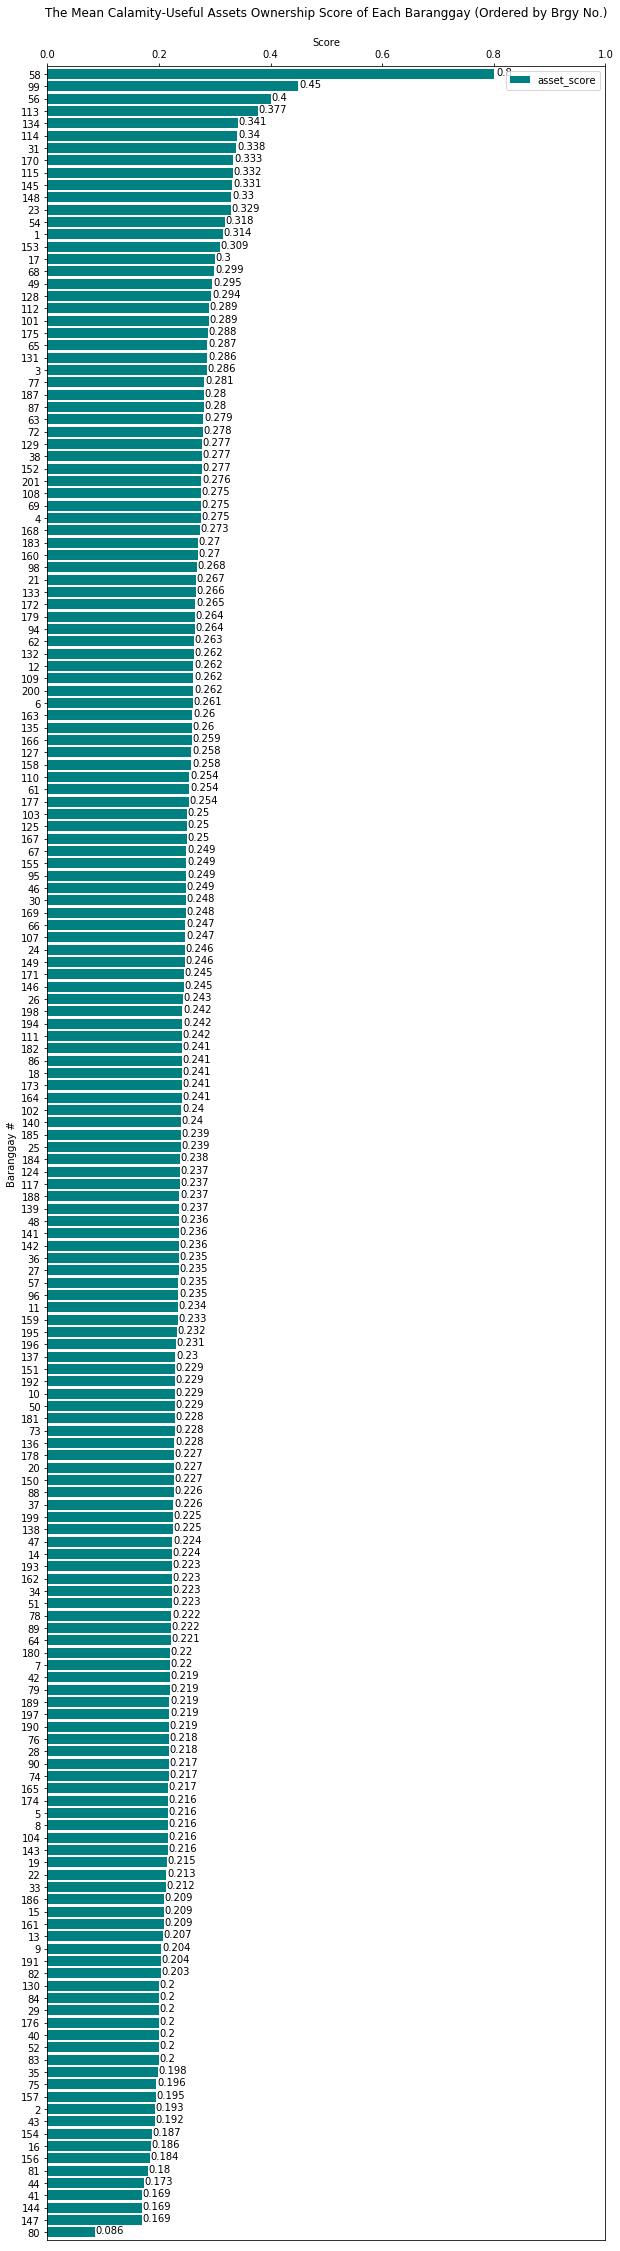

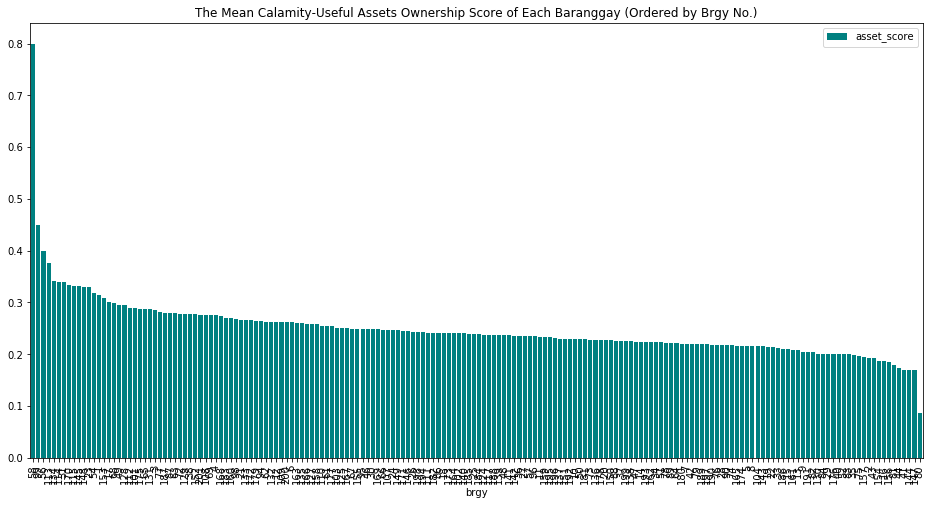

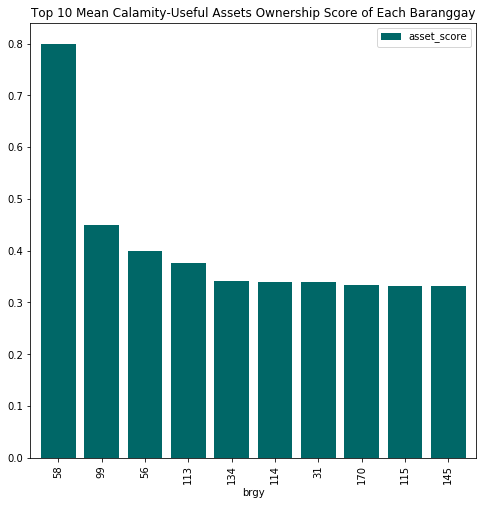

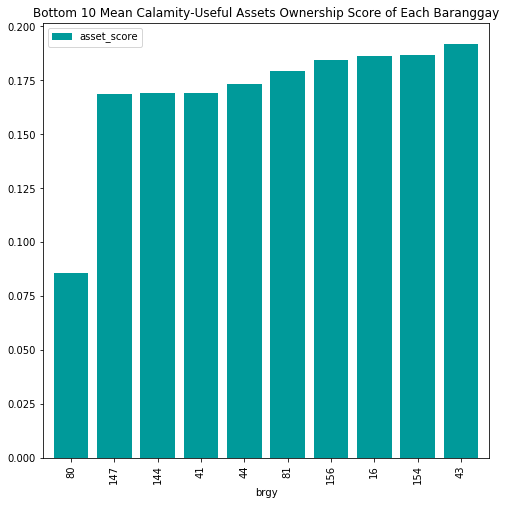

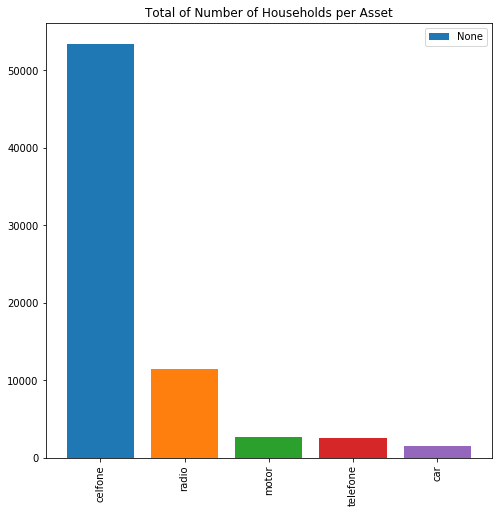

In [9]:
arrayBrgyScores = dfMain.groupby('brgy')['asset_score'].mean()
# Groups the families by brgy and takes the average of their asset score.
# Output is an array, not a dataframe.

#plot.style.use('default')

ax = arrayBrgyScores.sort_values(ascending=False).plot(kind='barh', figsize=(10, 40), color='#008080',  width=0.8, stacked=True)
ax.invert_yaxis()
ax.set_ylabel('Barangay #')
ax.set_xlabel('Score')    
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
for p in ax.patches:
    ax.annotate(str(round(p.get_width(),3)), (p.get_width() * 1.005, p.get_y() + 0.5))
plot.title('The Mean Calamity-Useful Assets Ownership Score of Each Barangay (Ordered by Brgy No.)', y=1.02)
plot.xlim(0,1)
plot.legend()
plot.show()
# Visualizes barangays in horizontal fashion ordered by brgy. for better lookup

arrayBrgyScores.sort_values(ascending=False).plot(figsize=(16, 8), kind='bar', color='#008080', align='center', width=0.8, stacked=True)
plot.title('The Mean Calamity-Useful Assets Ownership Score of Each Barangay (Ordered by Brgy No.)')
plot.legend()
plot.show()
# Bar graph of the top 10 brgys, 

arrayBrgyScores.nlargest(10).plot(figsize=(8, 8), kind='bar', color='#006767', align='center', width=0.8, stacked=True)
plot.title('Top 10 Mean Calamity-Useful Assets Ownership Score of Each Barangay')
plot.legend()
plot.show()
# Bar graph of the top 10 brgys, 

arrayBrgyScores.nsmallest(10).plot(figsize=(8, 8), kind='bar',color='#009a9a', align='center', width=0.8, stacked=True)
plot.title('Bottom 10 Mean Calamity-Useful Assets Ownership Score of Each Barangay')
plot.legend()
plot.show()
# Bar graph of the bottom 10 brgys

dfMain[['celfone','radio','motor','telefone','car']].sum().plot(figsize=(8, 8), kind='bar',  align='center', width=0.8, stacked=True)
plot.title('Total of Number of Households per Asset')
plot.legend()
plot.show()
# Bar graph of the total number of each asset of the respondents

# Calamity Prep Score 2: The Mean Calamity-Useful Assets Ownership of Each Barangay

## Assumptions: 
1. According to US Federal Emergency Management Agency, one of the important tools to have during a calamity is a radio. Radios are old but arguably more reliable since radio signal can withstand harsher weather than television signals or internet connections, besides this radios are more compact and can work with just batteries. According to Landau (2015), vehicles, especially motorcycles can be used as emergency vehicles to transport people to safer places such as evacuation centres before typhoons worsen. Kleinberg (2013) states that during typhoons as power outages can make the internet and other communication mediums unreliable, telefone on the other hand has it's own power supply network.

2. We found no study ranking or scoring the importance of each asset listed. It is just given that these are important in a calamity. Therefore we were not able to assign a weight to each asset because we cannot assume that a car is more important than a celfone and so on. We assumed that all these items are equally important.

3. We assumed that NaN responses indicated NON-OWNERSHIP of the asset.

## Explanation:
1. In the FIRST BAR GRAPH and SECOND BAR GRAPH, most barangays fall between the score range of 0.2 to 0.4 when it comes to asset ownership which indicates that most of these families only have 1-3 of the assets listed which are probably includes just celphones and tvs as can be seen in the FIFTH BAR GRAPH.

2. As seen in the THIRD BAR GRAPH, Brgy 58 has highest calamity-useful assets ownership score of approx. 0.8. This trend quickly and drastically dips with Brgy 99 which has a score of 0.45. This could point to Brgy 58 being having much more affluence than other brgys because their score indicates that people here almost have every kind of asset in our list, only missing one kind.

3. Based from the FOURTH BAR GRAPH, the lowest score in the top 10 is approx. 0.35 while the highest score in the bottom 10 is just below 0.2 which further supports the point made in number 1. The lowest score just below 0.1 belongs to brgy 80 which indicates that half of the respondents there only had one of the kinds of assets in our list while which could be assumed to be mostly cellphones while the other didn't have anything at all.

## Methodology:
1. Created a filtered dataframe copy of the original Main.CSV file that only contains the relevant variables for Score 2. These variables are INSERT THEM HERE.
2. Converted quantity responses in True or False responses by converting any response above 0 to 1. We only needed to know whether they have these assets or not, not how many of each kind of asset they have.
3. Summed the total of the kinds of assets owned per family.
4. Scored the family's asset ownership by getting the ratio of the family's kinds of owned assets over the total number of possible kinds of assets (5) in this scoring.
5. Grouped the families by barangay and then computed for the mean asset ownership score.

## References:
https://www.foxnews.com/lifestyle/the-10-things-you-need-to-have-in-your-disaster-emergency-kit
https://www.everydayhealth.com/healthy-home-pictures/what-you-need-when-disaster-strikes.aspx#04
http://www.thefiscaltimes.com/2014/10/14/10-Must-Have-Items-Your-Disaster-Survival-Kit
http://weatherplus.blog.palmbeachpost.com/2014/07/12/hurricane-season-reminder-have-a-land-line/

In [8]:
dfScore2 = pd.DataFrame(arrayBrgyScores);
dfScore2.to_csv('BrgyScore2.csv', encoding='utf-8')

# The computed means for each barangay's family college literacy rate is saved onto a CSV file for future use.